## 럭키백의 확률

## 데이터 준비하기

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
#물고기 종류 7가지
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()

In [7]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [8]:
# default = 75(trainset) : 25(testset)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled)
print(test_scaled)

[[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01  1.36042157e+00

## k- 최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
#알파벳 순
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [17]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [18]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))     #5개의 클래스

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [19]:
# 이웃 3개 중에서 Perch = 2/3, Roach = 1/3
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
* 시그모이드 함수(=로지스틱 함수) 이용
* 이름이 로지스틱 회귀 이지만 회귀가 아니라 분류 알고리즘이다. 
* 이진 분류 (0.5이상이면 양성클래스, 이하면 음성클래스)

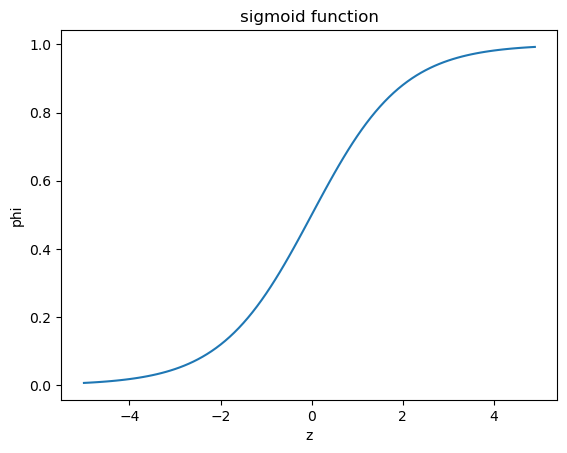

In [22]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('sigmoid function')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [24]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [31]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt)
print(target_bream_smelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [30]:
# LogisticRegression : 분류
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [33]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [34]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [35]:
print(lr.classes_)

['Bream' 'Smelt']


In [36]:
# -0.4037798*무게  -0.57620209*길이 -0.66280298*대각선 -1.01290277*높이 -0.73168947*두께
# -2.16155132
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [37]:
# 로지스틱 회귀는 decision_function을 통해 z 값을 출력
# decision_function 은 z 값 도출
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)    # decisions 는 sigmoid값

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [41]:
# expit ==> z값을 sigmoid 확률값으로
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 소프트맥스 함수
* 출력을 모두 합한 값은 항상 1
* softmax function의 수식
* 시그모이드 함수는 하나의 선형 방정식의 출력값을 0\~1 사이로 압축합니다. 이와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0\~1 사이로 압축하고 전체 합이 1이 되도록 만듭니다. 이를 위해 지수함수를 이용하기 때문에 정규화된 지수함수 라고도 부릅니다. 
* **다중분류일 때는 시그모이드 사용하면 안됩니다. 소프트맥스 함수를 사용해야 합니다.**

## 로지스틱회귀로 다중 분류 수행하기

In [42]:
lr = LogisticRegression(C = 20, max_iter = 1000)  #max_iter 기본값은 100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [43]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [44]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [45]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [46]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [48]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [50]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [52]:
# 다중분류일 때는 시그모이드 사용하면 안됩니다. 
# 소프트맥스 함수를 사용해야 합니다.

from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
